## Se presenta un breve análisis exploratorio de los datos públicos del Conacyt en su apoyo a la investigación académica en el periodo 2022.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
datos=pd.read_excel("Becas_CONACYT_al_Extranjero_de_Enero_a_Diciembre_2022.xlsx")

In [3]:
datos.head()

,CONSEC.,NOMBRE BECARIO,INICIO DE BECA,FIN DE BECA,NIVEL DE ESTUDIOS,INSTITUCIÓN,PAÍS,PROGRAMA DE ESTUDIOS,ÁREA DEL CONOCIMIENTO,CONVOCATORIA,IMPORTE PAGADO ENERO-MARZO,IMPORTE PAGADO ABRIL-JUNIO,IMPORTE PAGADO JULIO-SEPTIEMBRE,IMPORTE PAGADO OCTUBRE-DICIEMBRE,TOTAL PAGADO ENERO-DICIEMBRE
0,1,ABARCA CABRERA LUCIA,2020-01-01 00:00:00,2022-12-31 00:00:00,DOCTORADO,TECHNISCHE UNIVERSITAT MUNCHEN,ALEMANIA,STRUCTURED DOCTORATE,VI. BIOTECNOLOGIA Y CS. AGROPECUARIAS,BECAS CONACYT PARA ESTUDIOS DE DOCTORADO EN EL...,127226.78000,88816.020000,85765.1400,81760.860000,383568.800000
1,2,ABARCA CASTREJON IVAN ROGELIO,2021-08-01 01:00:00,2025-07-31 01:00:00,ESPECIALIDAD,COMERCIALIZADORA DE SERVICIOS MEDICOS CUBANOS,CUBA,GERIATRÍA,III. MEDICINA Y CS. DE LA SALUD,ESPECIALIDADES MÉDICAS EN EL EXTRANJERO 2020 -...,76424.99575,157162.513618,68437.5575,175970.789636,477995.856504
2,3,ABASCAL MIGUEL LUCIA,2020-09-01 01:00:00,2023-08-31 01:00:00,DOCTORADO,UNIVERSITY OF CALIFORNIA,ESTADOS UNIDOS,GLOBAL HEALTH SCIENCES,III. MEDICINA Y CS. DE LA SALUD,BECAS CONACYT PARA ESTUDIOS DE DOCTORADO EN EL...,85786.25000,83545.000000,84892.5000,82005.000000,336228.750000
3,4,ACEDO MESTRE MARIANA,2020-09-01 01:00:00,2022-01-31 00:00:00,MAESTRIA,TECHNISCHE UNIVERSITAT DARMSTADT,ALEMANIA,MASCHINENBAU - MECHANICAL AND PROCESS ENGINEER...,VII. INGENIERIAS,BECAS AL EXTRANJERO CONVENIOS DAAD 2020 - 1,32047.86000,0.000000,0.0000,0.000000,32047.860000
4,5,ACEVEDO BAHENA JOYCE,2021-08-01 01:00:00,2025-07-31 01:00:00,ESPECIALIDAD,COMERCIALIZADORA DE SERVICIOS MEDICOS CUBANOS,CUBA,MEDICINA DE REHABILITACIÓN,III. MEDICINA Y CS. DE LA SALUD,ESPECIALIDADES MÉDICAS EN EL EXTRANJERO 2020 -...,76424.99575,181182.215206,68437.5575,175970.789636,502015.558092


In [4]:
solicita=datos.groupby("NIVEL DE ESTUDIOS").size().reset_index(name="Qué es lo que más se solicita")

In [5]:
solicita_ord=solicita.sort_values(by="Qué es lo que más se solicita", ascending=False)
solicita_ord

,NIVEL DE ESTUDIOS,Qué es lo que más se solicita
0,DOCTORADO,1339
3,MAESTRIA,658
1,ESPECIALIDAD,440
2,LICENCIATURA,39
4,S/D,4


Notar que los 4 casos de "S/D" son en Stirling, porque hubo un convenio y no forma propiamente un grado.

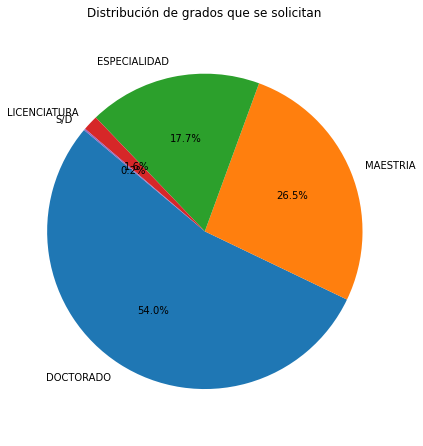

In [6]:
plt.figure(figsize=(6, 6.3))
plt.pie(solicita_ord['Qué es lo que más se solicita'], labels=solicita_ord['NIVEL DE ESTUDIOS'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de grados que se solicitan')
plt.axis('equal')  # Hacer que el gráfico de pastel sea circular
plt.tight_layout()
plt.show() 

In [7]:
paises=datos.groupby("PAÍS").size().reset_index(name="Países a donde llegan")

In [8]:
paises_ord=paises.sort_values(by="Países a donde llegan", ascending=False)
paises_ord.head(10)

,PAÍS,Países a donde llegan
33,REINO UNIDO,520
17,ESTADOS UNIDOS,396
13,CUBA,392
16,ESPAÑA,255
7,CANADA,231
0,ALEMANIA,200
20,FRANCIA,149
30,PAISES BAJOS,110
2,AUSTRALIA,44
27,ITALIA,25


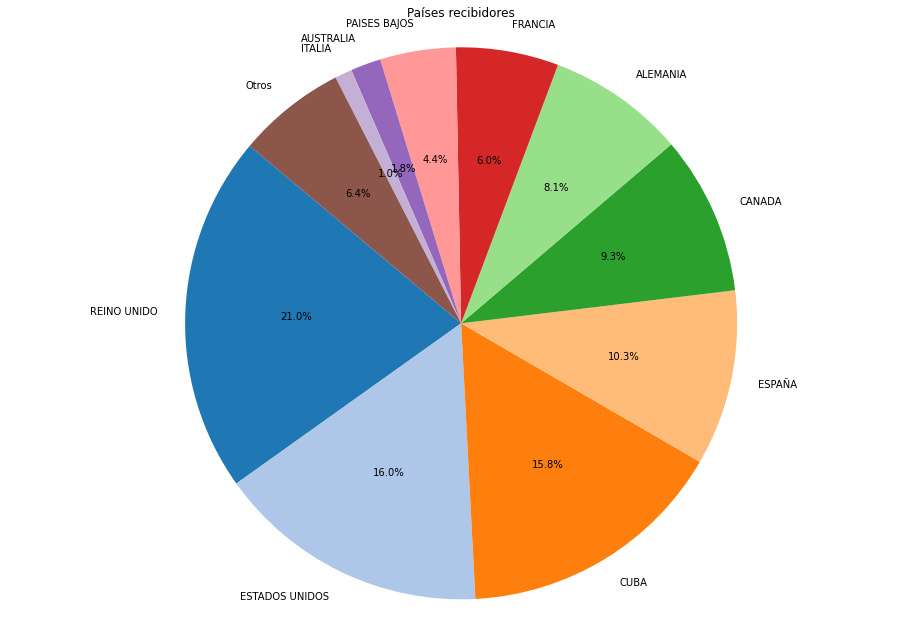

In [9]:
top_10 = paises_ord.head(10)
otros = pd.DataFrame({
    'PAÍS': ['Otros'],
    'Países a donde llegan': [paises_ord['Países a donde llegan'].iloc[10:].sum()]
})

# Concatenar los datos de los 10 primeros con el de "otros"
nuevos_datos = pd.concat([top_10, otros])

# Lista de colores
paleta_colores = plt.get_cmap('tab20')
colores = paleta_colores(range(len(nuevos_datos)))


# Crear el gráfico de pastel con los 10 primeros y "otros"
plt.figure(figsize=(12.9, 8.9))
plt.pie(nuevos_datos['Países a donde llegan'], labels=nuevos_datos['PAÍS'], autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Países recibidores')
plt.axis('equal')  # Hacer que el gráfico de pastel sea circular
plt.tight_layout()
plt.show()

Haciendo un análisis más profundo:

In [10]:
#considerar solo maestría y doctorado
grados_filtrados = datos[datos['NIVEL DE ESTUDIOS'].isin(['DOCTORADO', 'MAESTRIA'])]


In [11]:
grados_filtrados.head()

,CONSEC.,NOMBRE BECARIO,INICIO DE BECA,FIN DE BECA,NIVEL DE ESTUDIOS,INSTITUCIÓN,PAÍS,PROGRAMA DE ESTUDIOS,ÁREA DEL CONOCIMIENTO,CONVOCATORIA,IMPORTE PAGADO ENERO-MARZO,IMPORTE PAGADO ABRIL-JUNIO,IMPORTE PAGADO JULIO-SEPTIEMBRE,IMPORTE PAGADO OCTUBRE-DICIEMBRE,TOTAL PAGADO ENERO-DICIEMBRE
0,1,ABARCA CABRERA LUCIA,2020-01-01 00:00:00,2022-12-31 00:00:00,DOCTORADO,TECHNISCHE UNIVERSITAT MUNCHEN,ALEMANIA,STRUCTURED DOCTORATE,VI. BIOTECNOLOGIA Y CS. AGROPECUARIAS,BECAS CONACYT PARA ESTUDIOS DE DOCTORADO EN EL...,127226.7800,88816.02,85765.14,81760.8600,383568.8000
2,3,ABASCAL MIGUEL LUCIA,2020-09-01 01:00:00,2023-08-31 01:00:00,DOCTORADO,UNIVERSITY OF CALIFORNIA,ESTADOS UNIDOS,GLOBAL HEALTH SCIENCES,III. MEDICINA Y CS. DE LA SALUD,BECAS CONACYT PARA ESTUDIOS DE DOCTORADO EN EL...,85786.2500,83545.00,84892.50,82005.0000,336228.7500
3,4,ACEDO MESTRE MARIANA,2020-09-01 01:00:00,2022-01-31 00:00:00,MAESTRIA,TECHNISCHE UNIVERSITAT DARMSTADT,ALEMANIA,MASCHINENBAU - MECHANICAL AND PROCESS ENGINEER...,VII. INGENIERIAS,BECAS AL EXTRANJERO CONVENIOS DAAD 2020 - 1,32047.8600,0.00,0.00,0.0000,32047.8600
5,6,ACEVES SERRANO LUCERO GUADALUPE,2018-09-01 01:00:00,2022-04-30 01:00:00,DOCTORADO,UNIVERSITY OF BRITISH COLUMBIA,CANADA,NEUROSCIENCE,III. MEDICINA Y CS. DE LA SALUD,BECAS AL EXTRANJERO DEMANDA LIBRE 2018 - 1,122295.4118,70498.96,72152.88,176939.5872,441886.8390
6,7,ACOSTA CALVILLO ADAN ISAAC,2016-05-01 00:00:00,2020-04-30 00:00:00,DOCTORADO,UNIVERSITY OF CALGARY,CANADA,BIOMEDICAL ENGINEERING,VII. INGENIERIAS,CAMBIOS DE GRADO INTERNACIONAL,30144.6462,0.00,0.00,0.0000,30144.6462


In [12]:
paises_filtrados=grados_filtrados.groupby("PAÍS").size().reset_index(name="Países a donde llegan")

In [13]:
paises_ord_f=paises_filtrados.sort_values(by="Países a donde llegan", ascending=False)
paises_ord_f.head(10)

,PAÍS,Países a donde llegan
33,REINO UNIDO,516
17,ESTADOS UNIDOS,395
7,CANADA,231
0,ALEMANIA,199
16,ESPAÑA,183
20,FRANCIA,149
30,PAISES BAJOS,110
2,AUSTRALIA,44
27,ITALIA,24
6,BRASIL,20


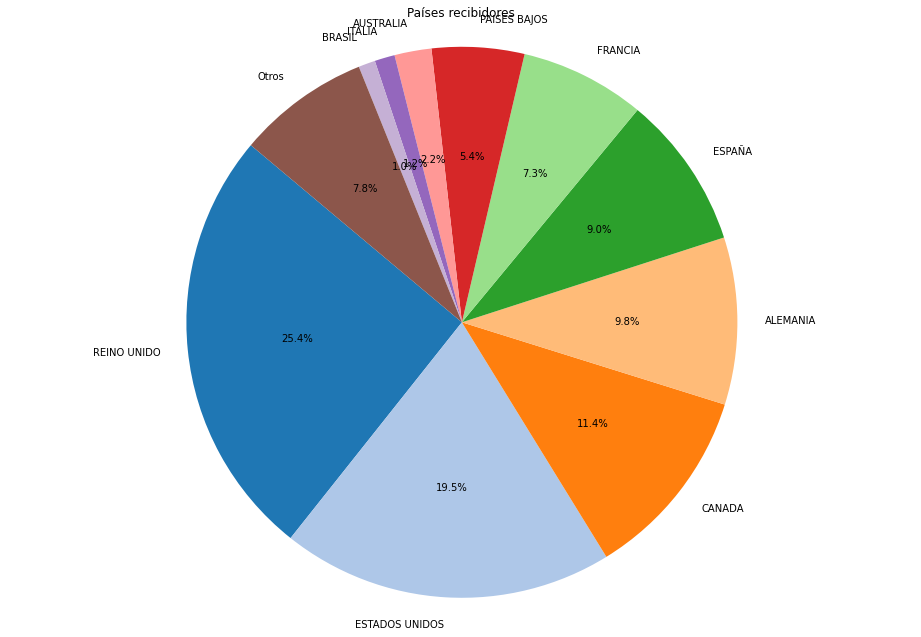

In [14]:
top_10 = paises_ord_f.head(10)
otros = pd.DataFrame({
    'PAÍS': ['Otros'],
    'Países a donde llegan': [paises_ord['Países a donde llegan'].iloc[10:].sum()]
})

# Concatenar los datos de los 10 primeros con el de "otros"
nuevos_datos = pd.concat([top_10, otros])

# Lista de colores
paleta_colores = plt.get_cmap('tab20')
colores = paleta_colores(range(len(nuevos_datos)))


# Crear el gráfico de pastel con los 10 primeros y "otros"
plt.figure(figsize=(12.9, 8.9))
plt.pie(nuevos_datos['Países a donde llegan'], labels=nuevos_datos['PAÍS'], autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Países recibidores')
plt.axis('equal')  # Hacer que el gráfico de pastel sea circular
plt.tight_layout()
plt.show()

Notar que los países que más reciben estudiantes de doctorado o de maestría son casi los mismos, a excepción de Cuba porque este país se enfoca más en especialidades.

In [15]:
universidades=datos.groupby(["INSTITUCIÓN","PAÍS","NIVEL DE ESTUDIOS"]).size().reset_index(name="Universidades destino")

In [16]:
universidades_ord=universidades.sort_values(by="Universidades destino", ascending=False)
universidades_ord.head(10)

,INSTITUCIÓN,PAÍS,NIVEL DE ESTUDIOS,Universidades destino
44,COMERCIALIZADORA DE SERVICIOS MEDICOS CUBANOS,CUBA,ESPECIALIDAD,319
514,UNIVERSITY OF CALIFORNIA,ESTADOS UNIDOS,DOCTORADO,60
201,MCGILL UNIVERSITY,CANADA,DOCTORADO,56
610,UNIVERSITY OF TEXAS,ESTADOS UNIDOS,DOCTORADO,54
229,ORGANIZACION IBEROAMERICANA DE SEGURIDAD SOCIAL,ESPAÑA,ESPECIALIDAD,46
552,UNIVERSITY OF LEEDS,REINO UNIDO,DOCTORADO,46
532,UNIVERSITY OF EDINBURGH,REINO UNIDO,DOCTORADO,29
202,MCGILL UNIVERSITY,CANADA,MAESTRIA,28
294,TECHNISCHE UNIVERSITAT MUNCHEN,ALEMANIA,MAESTRIA,28
336,UNIVERSIDAD DE LA HABANA,CUBA,ESPECIALIDAD,28


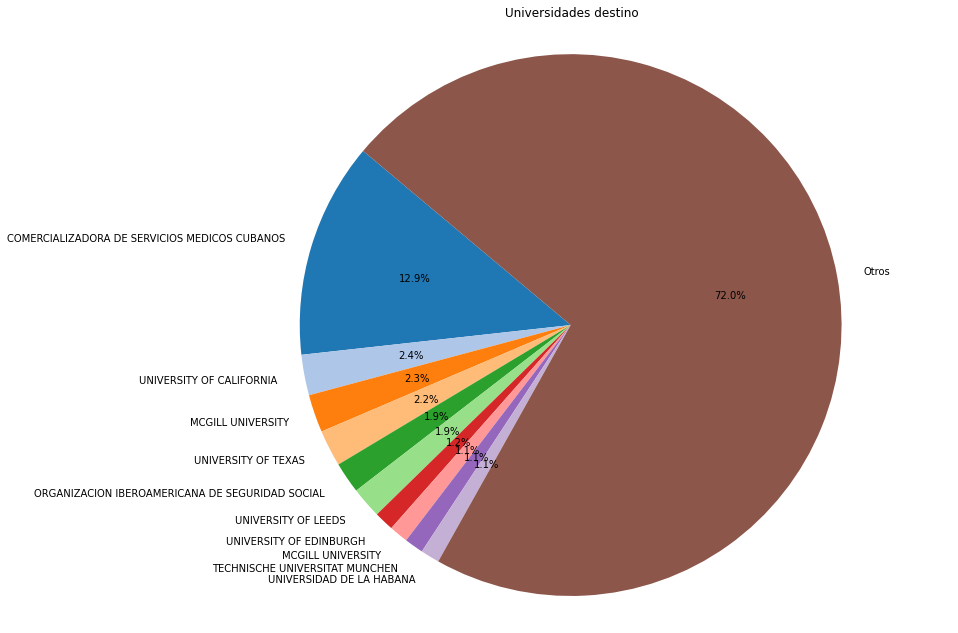

In [17]:
top_10 = universidades_ord.head(10)
otros = pd.DataFrame({
    'INSTITUCIÓN': ['Otros'],
    'Universidades destino': [universidades_ord['Universidades destino'].iloc[10:].sum()]
})

# Concatenar los datos de los 10 primeros con el de "otros"
nuevos_datos = pd.concat([top_10, otros])

# Lista de colores
paleta_colores = plt.get_cmap('tab20')
colores = paleta_colores(range(len(nuevos_datos)))


# Crear el gráfico de pastel con los 10 primeros y "otros"
plt.figure(figsize=(12.9, 8.9))
plt.pie(nuevos_datos['Universidades destino'], labels=nuevos_datos['INSTITUCIÓN'], autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Universidades destino')
plt.axis('equal')  # Hacer que el gráfico de pastel sea circular
plt.tight_layout()
plt.show()

Considerando solo doctorado:

In [18]:
doctorado = datos[datos['NIVEL DE ESTUDIOS'].isin(['DOCTORADO'])]
doctorado.head()

,CONSEC.,NOMBRE BECARIO,INICIO DE BECA,FIN DE BECA,NIVEL DE ESTUDIOS,INSTITUCIÓN,PAÍS,PROGRAMA DE ESTUDIOS,ÁREA DEL CONOCIMIENTO,CONVOCATORIA,IMPORTE PAGADO ENERO-MARZO,IMPORTE PAGADO ABRIL-JUNIO,IMPORTE PAGADO JULIO-SEPTIEMBRE,IMPORTE PAGADO OCTUBRE-DICIEMBRE,TOTAL PAGADO ENERO-DICIEMBRE
0,1,ABARCA CABRERA LUCIA,2020-01-01 00:00:00,2022-12-31 00:00:00,DOCTORADO,TECHNISCHE UNIVERSITAT MUNCHEN,ALEMANIA,STRUCTURED DOCTORATE,VI. BIOTECNOLOGIA Y CS. AGROPECUARIAS,BECAS CONACYT PARA ESTUDIOS DE DOCTORADO EN EL...,127226.7800,88816.02,85765.14,81760.8600,383568.8000
2,3,ABASCAL MIGUEL LUCIA,2020-09-01 01:00:00,2023-08-31 01:00:00,DOCTORADO,UNIVERSITY OF CALIFORNIA,ESTADOS UNIDOS,GLOBAL HEALTH SCIENCES,III. MEDICINA Y CS. DE LA SALUD,BECAS CONACYT PARA ESTUDIOS DE DOCTORADO EN EL...,85786.2500,83545.00,84892.50,82005.0000,336228.7500
5,6,ACEVES SERRANO LUCERO GUADALUPE,2018-09-01 01:00:00,2022-04-30 01:00:00,DOCTORADO,UNIVERSITY OF BRITISH COLUMBIA,CANADA,NEUROSCIENCE,III. MEDICINA Y CS. DE LA SALUD,BECAS AL EXTRANJERO DEMANDA LIBRE 2018 - 1,122295.4118,70498.96,72152.88,176939.5872,441886.8390
6,7,ACOSTA CALVILLO ADAN ISAAC,2016-05-01 00:00:00,2020-04-30 00:00:00,DOCTORADO,UNIVERSITY OF CALGARY,CANADA,BIOMEDICAL ENGINEERING,VII. INGENIERIAS,CAMBIOS DE GRADO INTERNACIONAL,30144.6462,0.00,0.00,0.0000,30144.6462
7,8,ACOSTA CAMBRANIS FERNANDO GEOVANY,2018-06-01 00:00:00,2022-05-31 00:00:00,DOCTORADO,UNIVERSIDAD POLITECNICA DE CATALUÑA,ESPAÑA,INGENIERIA ELECTRONICA,VII. INGENIERIAS,CAMBIOS DE GRADO INTERNACIONAL,95067.6000,59669.22,0.00,0.0000,154736.8200


In [19]:
paises_doctorado=doctorado.groupby(["INSTITUCIÓN","PAÍS","NIVEL DE ESTUDIOS"]).size().reset_index(name="Universidades destino")

In [27]:
paises_doctorado_d=paises_doctorado.sort_values(by="Universidades destino", ascending=False)
paises_doctorado_d.head(35)

,INSTITUCIÓN,PAÍS,NIVEL DE ESTUDIOS,Universidades destino
264,UNIVERSITY OF CALIFORNIA,ESTADOS UNIDOS,DOCTORADO,60
95,MCGILL UNIVERSITY,CANADA,DOCTORADO,56
323,UNIVERSITY OF TEXAS,ESTADOS UNIDOS,DOCTORADO,54
287,UNIVERSITY OF LEEDS,REINO UNIDO,DOCTORADO,46
275,UNIVERSITY OF EDINBURGH,REINO UNIDO,DOCTORADO,29
313,UNIVERSITY OF SHEFFIELD,REINO UNIDO,DOCTORADO,27
279,UNIVERSITY OF GRONINGEN,PAISES BAJOS,DOCTORADO,27
290,UNIVERSITY OF LONDON,REINO UNIDO,DOCTORADO,26
29,DURHAM UNIVERSITY,REINO UNIDO,DOCTORADO,25
303,UNIVERSITY OF NOTTINGHAM,REINO UNIDO,DOCTORADO,25


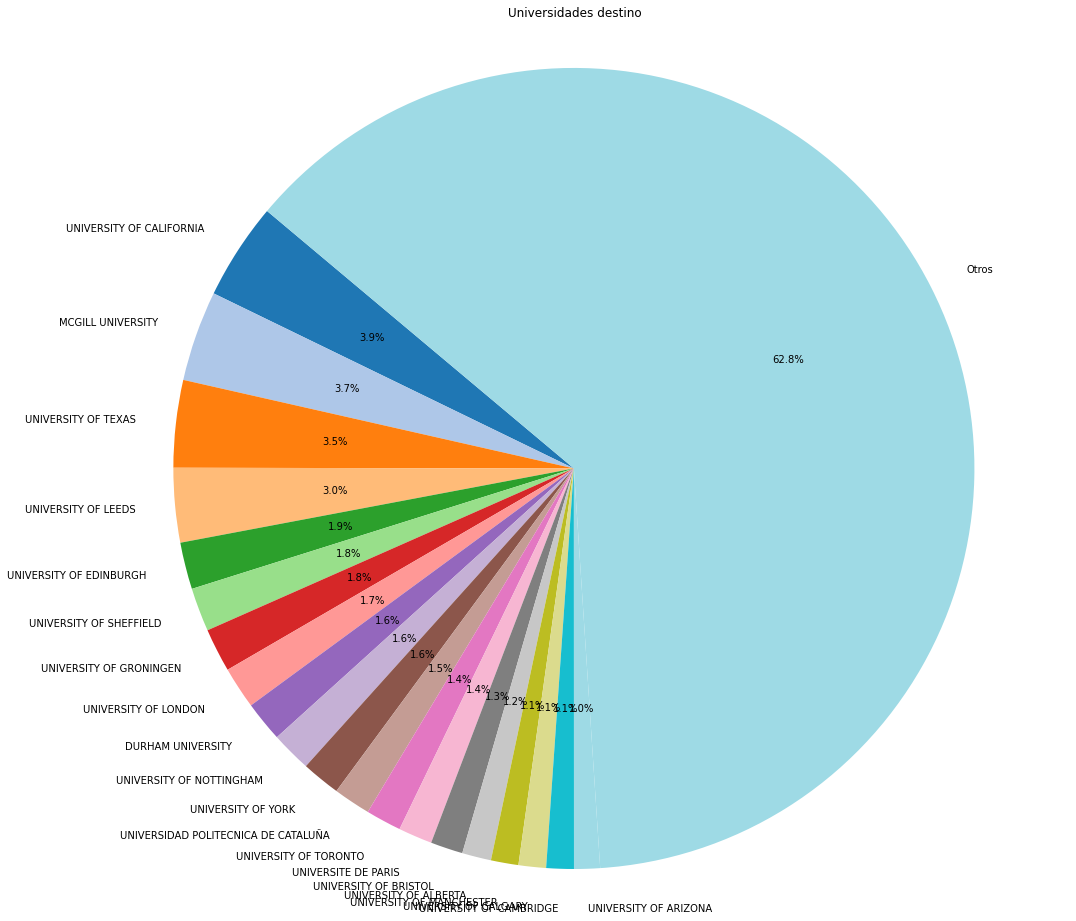

In [26]:
top_20 = paises_doctorado_d.head(20)
otros = pd.DataFrame({
    'INSTITUCIÓN': ['Otros'],
    'Universidades destino': [paises_doctorado_d['Universidades destino'].iloc[10:].sum()]
})

# Concatenar los datos de los 10 primeros con el de "otros"
nuevos_datos = pd.concat([top_20, otros])

# Lista de colores
paleta_colores = plt.get_cmap('tab20')
colores = paleta_colores(range(len(nuevos_datos)))


# Crear el gráfico de pastel con los 10 primeros y "otros"
plt.figure(figsize=(14.9, 12.9))
plt.pie(nuevos_datos['Universidades destino'], labels=nuevos_datos['INSTITUCIÓN'], autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Universidades destino')
plt.axis('equal')  # Hacer que el gráfico de pastel sea circular
plt.tight_layout()
plt.show()